In [1]:
#import the necessary libraries(data manipulation, visualization, financial analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as ta
import pynance as pn

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

In [2]:
# Load GOOG data from the yfinance_data directory
df = pd.read_csv("../yfinance_data/NVDA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

ticker = 'NVDA'
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = df[col].astype(float)

first_row = pd.DataFrame({
    'Open': [df['Open'].iloc[0]], 
    'High': [df['High'].iloc[0]], 
    'Low': [df['Low'].iloc[0]], 
    'Close': [df['Close'].iloc[0]], 
    'Volume': [df['Volume'].iloc[0]],
    'Ticker': [ticker]  # ticker in first row
}, index=[df.index[0]])

df['Ticker'] = None

df = pd.concat([first_row, df.iloc[1:]])

print(df.head())

                Open      High       Low     Close        Volume Ticker
2009-01-02  0.184982  0.201027  0.184294  0.199652  4.971240e+08   NVDA
2009-01-05  0.197360  0.207904  0.195984  0.203319  7.057360e+08   None
2009-01-06  0.209279  0.216156  0.204695  0.210196  6.579040e+08   None
2009-01-07  0.205382  0.205382  0.190483  0.197589  8.700960e+08   None
2009-01-08  0.195067  0.195067  0.180626  0.192546  1.014496e+09   None


In [3]:
# Clean column names if they are MultiIndex

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  
print("Cleaned columns:", df.columns.tolist())
df["Ticker"] = ticker

df_numeric_index = df[df.index != 'Ticker'].copy()
df_numeric_index.index = pd.to_datetime(df_numeric_index.index)
df_numeric_index = df_numeric_index.sort_index()

print(df_numeric_index.head())

Cleaned columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']
                Open      High       Low     Close        Volume Ticker
2009-01-02  0.184982  0.201027  0.184294  0.199652  4.971240e+08   NVDA
2009-01-05  0.197360  0.207904  0.195984  0.203319  7.057360e+08   NVDA
2009-01-06  0.209279  0.216156  0.204695  0.210196  6.579040e+08   NVDA
2009-01-07  0.205382  0.205382  0.190483  0.197589  8.700960e+08   NVDA
2009-01-08  0.195067  0.195067  0.180626  0.192546  1.014496e+09   NVDA


In [4]:
# Basic Exploratory Data Analysis
print(df.info())
print(df.describe())
print(df.isnull().sum())  
df.dropna(inplace=True)  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Close   3774 non-null   float64
 4   Volume  3774 non-null   float64
 5   Ticker  3774 non-null   object 
dtypes: float64(5), object(1)
memory usage: 206.4+ KB
None
              Open         High          Low        Close        Volume
count  3774.000000  3774.000000  3774.000000  3774.000000  3.774000e+03
mean      6.793541     6.915713     6.666721     6.796822  5.230753e+08
std      10.659140    10.843532    10.461388    10.659754  3.205760e+08
min       0.165269     0.171228     0.162289     0.165269  4.564400e+07
25%       0.357017     0.362422     0.351743     0.357397  3.188510e+08
50%       1.166935     1.176017     1.157976     1.167304  4.495585e+08
75%       6.93995

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_32340\4062678205.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


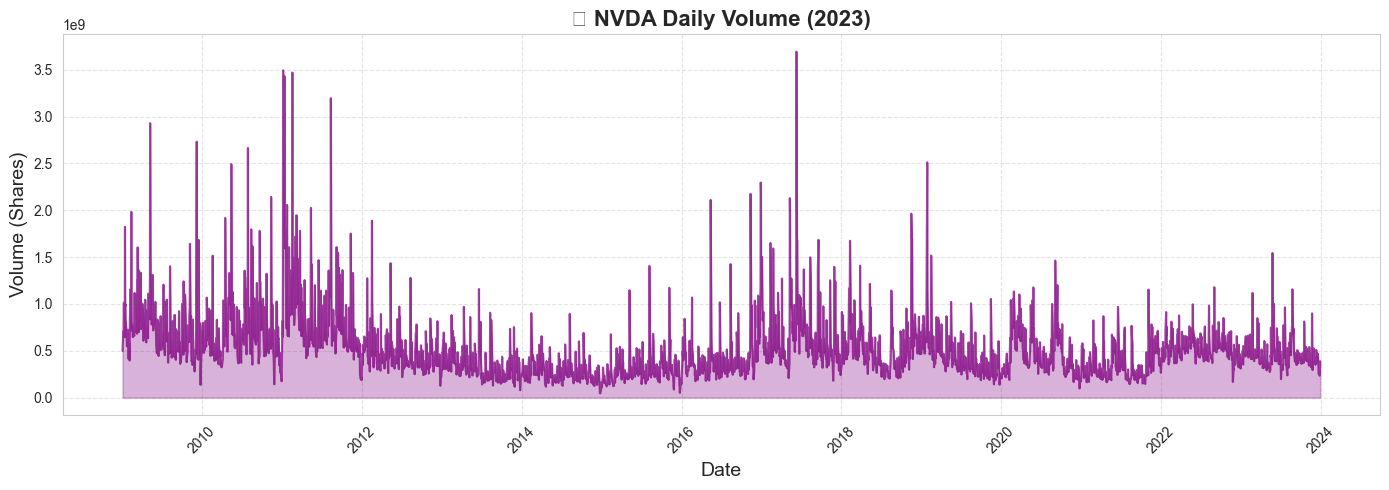

In [5]:
plt.figure(figsize=(14,5))
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
df.dropna(subset=['Volume'], inplace=True) 
plt.fill_between(df.index, df['Volume'], color="purple", alpha=0.3)
plt.plot(df.index, df['Volume'], color="purple", alpha=0.7)
plt.title("📊 NVDA Daily Volume (2023)", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume (Shares)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

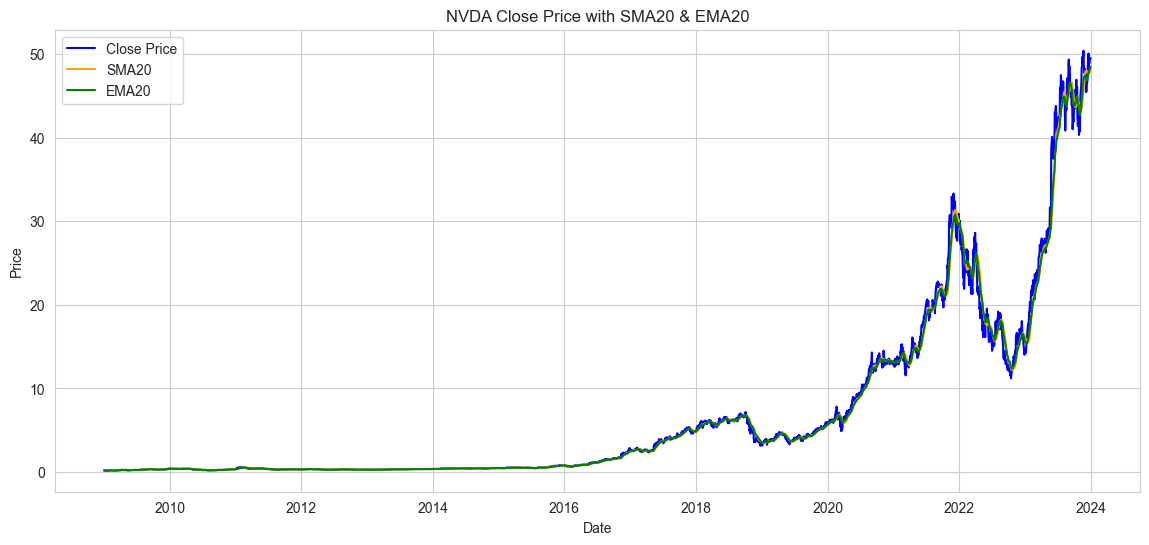

In [7]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True) 
df['SMA20'] = df['Close'].rolling(window=20).mean()

df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()
 
 # SMA and EMA Plot 
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA20'], label='SMA20', color='orange')
plt.plot(df['EMA20'], label='EMA20', color='green')
plt.title('NVDA Close Price with SMA20 & EMA20')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


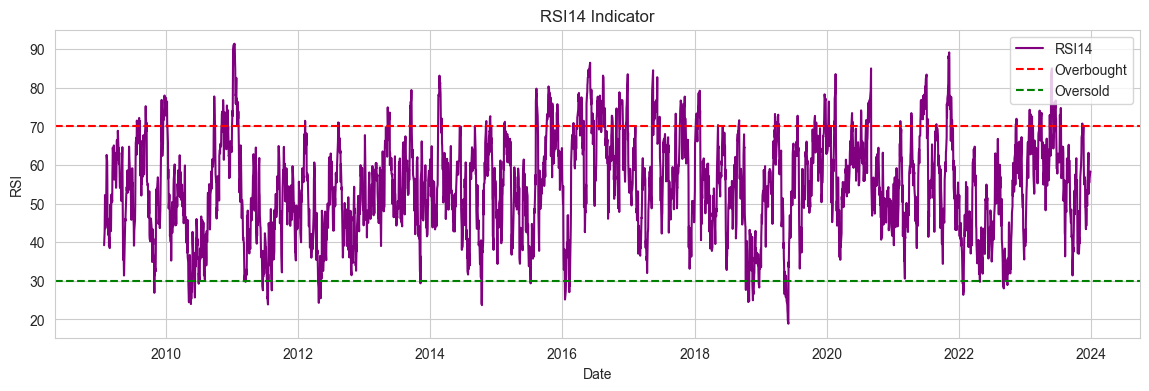

In [8]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)
df['RSI14'] = ta.RSI(df['Close'], timeperiod=14)

#RSI Indicator Plot
plt.figure(figsize=(14,4))
plt.plot(df['RSI14'], label='RSI14', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI14 Indicator')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

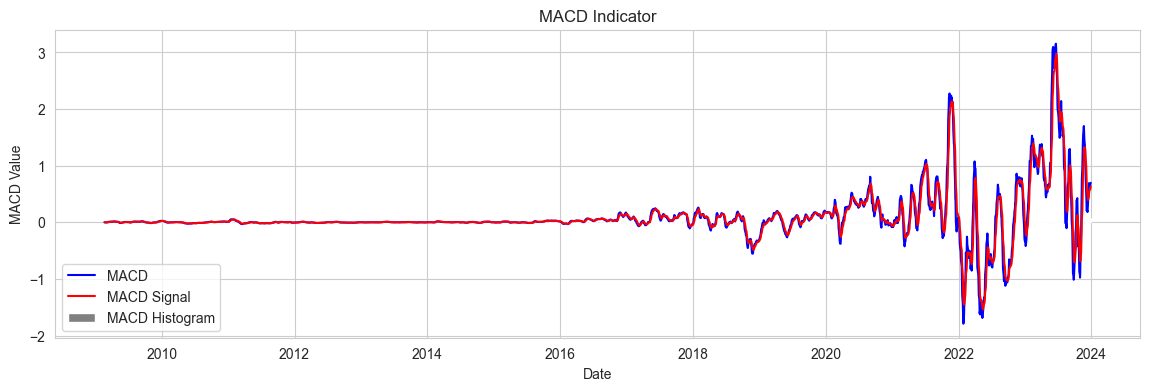

In [9]:
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df.dropna(subset=['Close'], inplace=True)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(
    df['Close'],
    fastperiod=12,
    slowperiod=26,
    signalperiod=9
)

# MACD indicator plot
plt.figure(figsize=(14,4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_hist'], label='MACD Histogram', color='gray')
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_32340\767628574.py:23: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


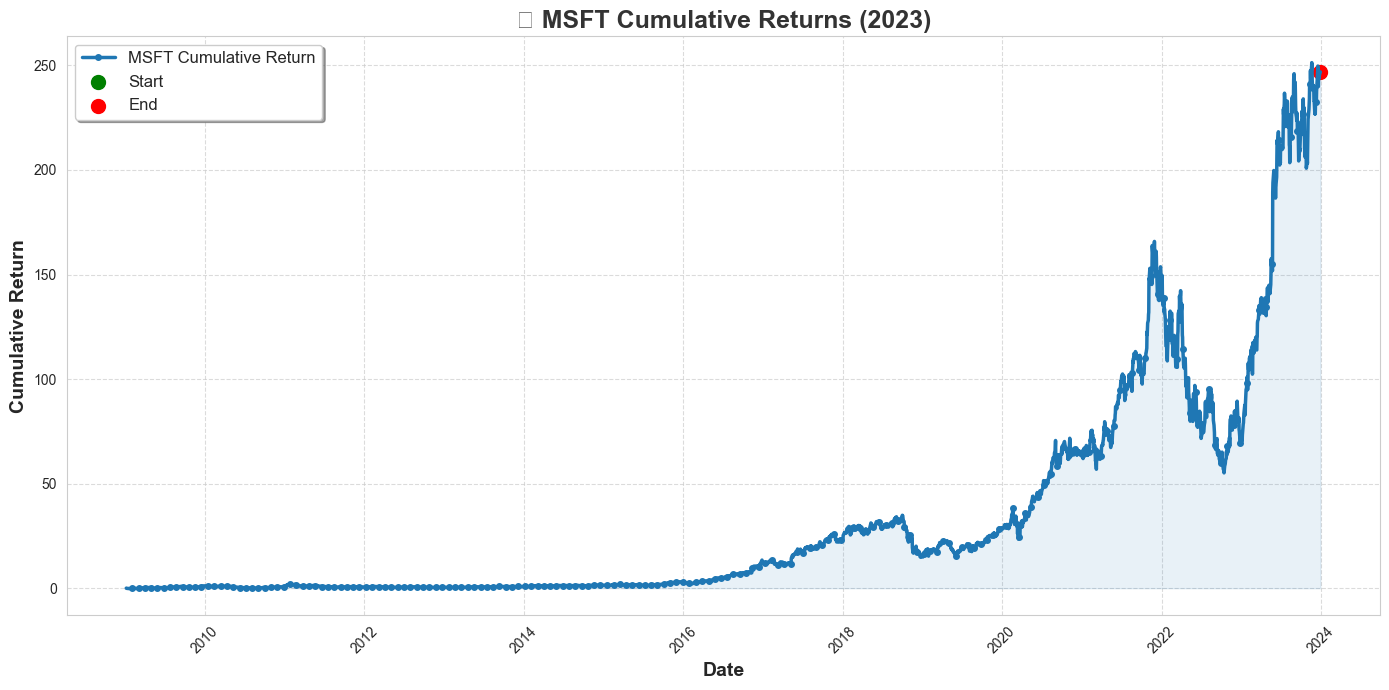

In [ ]:
df['Daily_Return'] = df['Close'].pct_change()
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod() - 1

# Cumulative Return Plot with Enhanced Visualization
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Cumulative_Return'], label="NVDA Cumulative Return", 
         color="#1f77b4", linewidth=2.5, marker='o', markersize=4, markevery=20)

plt.fill_between(df.index, df['Cumulative_Return'], color="#1f77b4", alpha=0.1)
plt.grid(True, linestyle='--', alpha=0.7)

plt.title("📈 NVDA Cumulative Returns (2023)", fontsize=18, fontweight='bold', color="#333333")
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Cumulative Return", fontsize=14, fontweight='bold')

plt.scatter(df.index[0], df['Cumulative_Return'].iloc[0], color="green", s=100, label="Start")
plt.scatter(df.index[-1], df['Cumulative_Return'].iloc[-1], color="red", s=100, label="End")
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
# MSFT?

In [ ]:
# Step 5: PyNance Portfolio Metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pynance import portfolio_optimizer as po

# Select tickers for your portfolio
ticker_list = ['TSLA', 'AAPL', 'MSFT']

# Create a PortfolioCalculations object
portfolio = po.PortfolioCalculations(ticker_list)

# Max Sharpe Portfolio
max_sharpe_rr = portfolio.max_sharpe_portfolio('rr')
max_sharpe_df = portfolio.max_sharpe_portfolio('df')
print("Max Sharpe Portfolio Risk/Return:")
print(max_sharpe_rr)
print("\nPortfolio Weights:")
print(max_sharpe_df)

# Min Variance Portfolio
min_var_rr = portfolio.min_var_portfolio('rr')
min_var_df = portfolio.min_var_portfolio('df')
print("\nMin Variance Portfolio Risk/Return:")
print(min_var_rr)
print("\nPortfolio Weights (Min Variance):")
print(min_var_df)